<a href="https://colab.research.google.com/github/Maucho6340/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [99]:
import pandas as pd


In [100]:
datos=pd.read_csv('/content/prestacar.csv')

In [101]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [102]:
X = datos.drop(columns='moroso', axis=1)
y = datos['moroso']

In [103]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X,y)

1.0

In [104]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [105]:
from sklearn.model_selection import train_test_split # train_test-split separa en base de prueba y base de entrenamiento

In [106]:
# train_test_split permite hacer una división de un conjunto de datos en dos bloques de entrenamiento y prueba de un modelo (train and test).
#                  Si no le pedimos estratificar, en automático reserva 70-75% para train y 30-25% para test.
# test_size=0.15: Vamos a tomar una base de prueba del 15% de los datos.
# stratify permite tener grupos de datos con las mismas características (que deje la misma cant de obs para morosos en los 2 conjuntos de datos que estoy seleccionando)
# random_state=5 va a permite replicar esta misma división (la forma cómo voy a dividir las muestras) en cualquier ejercicio
#                 X, x_test, y , y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
# Hacemos lo mismo para nuestra validación
#                 X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [107]:
# División inicial en entrenamiento + prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)

# División secundaria en entrenamiento + validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, stratify=y_train_val, random_state=5)

In [108]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 1.0
La exactitud del modelo con el conjunto de validación es: 0.846053347849755


En el entrenamiento hizo 100% y a la hora de validar, hizo 85%. Quiere decir que mi modelo de árbol se memorizó todas las salidas y por eso llego al 100%, pero al momento de colocar datos que no ha visto, alcanzó 85%.<br>
Esta no es la mejor manera de estanciar un modelo de árbol, sino, debemo establecer una profundidad por lo menos.

In [109]:
modelo = DecisionTreeClassifier(max_depth=10) # Asignamos profundidad por que de lo contrario ae va a ir hasta el final y obtiene 100%
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.9214939024390244
La exactitud del modelo con el conjunto de validación es: 0.9087642896026129


Con este parámetro depth, el modelo durante el entrenamiento llegó a una exactitud de un 92% y durante la validación a un 90%. En conclusión, está generalizando mejor, por que no está memorizando todas las áreas.

##### <font color='blue'>**Para saber más**: método holdout

En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:<br>
<a href="https://cdn1.gnarususercontent.com.br/6/103811/f44c59e7-205f-4ec0-bb7a-c4bb078159e6.png">
  <img src="https://cdn1.gnarususercontent.com.br/6/103811/f44c59e7-205f-4ec0-bb7a-c4bb078159e6.png" alt="imagen técnica" border="0">
</a>

En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.<br>


<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

### Evaluando el modelo

La exactitud de 90 u 80% no nos dice mucho, solo que el modelo está generalizando bien, pero no conocemos en detalle qué es lo que está generalizando y si es de nuestro interés.<br>
Para ello vamos a apoyarnos en una herramienta para validar nuestro modelo, que es la <font color='green'>**Matriz de Confusión**

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
# confusion_matrix es una herramienta para validar nuestro modelo
# Creamos una variable que toma nuestro último modelo para hacer una predicción con X de validación
# Luego creamos nuestra matriz de confusión, que tomará nuestra "confusion_matrix" que recibe la
#     y de validación y la y prevista (compara valores reales con previstos)
y_previsto = modelo.predict(X_val)
matriz_confusion =confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[8327   56]
 [ 782   20]]


Me devolvió una matriz con valores que no se interpretar, por lo que procedo a nuestra matriz de confusión.

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay #Permitirá graficar nuestra Matriz de Confusión

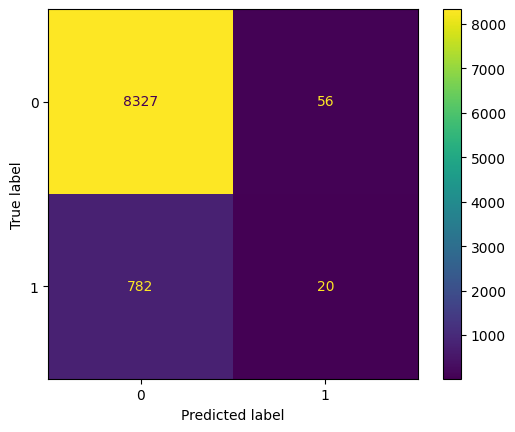

In [113]:
visualizacion=ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot(); # este "; se instala para suprimir la salida de texto adicional que el comando .plot() podría generar, mostrando sólo el gráfico.

En eje X e Y 0 siendo cumplidor y 1 siendo moroso

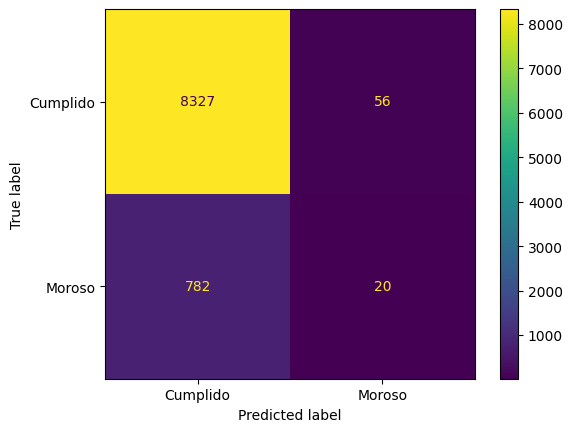

In [114]:
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

Mi modelo predijo "cumplido" 8327 clientes de forma correcta, sin embargo, 782 clientes fueron clasificados como "cumplidos" pero en realidad eran "morosos"; lo que representa un riesgo muy grande.<br>
Asimismo, el modelo predijo que 782 clientes eran morosos, pero en realidad eran "cumplido" y unicamente identificó 20 "morosos" correctamente.<br>
Estos números permitirán ir trabajando nuetro modelo para ir mejorándolo, ya que aquí estamos observando unos errores que vamos a profundizar en el siguiente capítulo.

##### <font color='blue'>**Para saber más**: entendiendo la matriz de confusión

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.<br>

<img src="https://cdn1.gnarususercontent.com.br/6/103811/f881b231-7f60-4f0a-9eb8-2c748f5e1c74.png" alt="imagen técnica 2" border="0">

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

- Verdaderos Negativos (VN): Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.
- Falsos Positivos (FP): Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.
- Falsos Negativos (FN): Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.
- Verdaderos Positivos (VP): Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.<br>

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

##### <font color='blue'>**Desafío**: construyendo un segundo modelo

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

**<u>SOLUCIÓN</u>**

El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:

In [58]:
from sklearn.ensemble import RandomForestClassifier

Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:

In [59]:
#modelo = RandomForestClassifier(max_depth = 10)
#modelo.fit(x_entrenamiento, y_entrenamiento)
#print(f'Precisión de entrenamiento: {modelo.score(x_entrenamiento, y_entrenamiento)}')
#print(f'Precisión de validación: {modelo.score(x_val, y_val)}')

Al ejecutar el código, obtendremos el siguiente resultado:

Precisión de entrenamiento: 0.9154761904761904

Precisión de validación: 0.9127253723543245

Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.

Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:

In [60]:
#y_previsto = modelo.predict(x_val)
#matriz_confusion = confusion_matrix(y_val, y_previsto)
#visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
#                                      display_labels = ['Cumplido', 'Moroso'])
#visualizacion.plot();

Al ejecutar el código, obtendremos el siguiente resultado:

<img src="https://cdn1.gnarususercontent.com.br/6/103811/a4f8b7f5-6cae-4ab1-9103-bc4822ddad48.png" alt="imagen técnica 3" border="0">

A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo RandomForest no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

##### <font color='blue'>**Desafío**: hora de la práctica

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [77]:
#1 - Para hacer la lectura de la base de datos, debemos importar la biblioteca pandas. Hacemos esto con el código:

import pandas as pd

In [82]:
# A partir de esto, podemos hacer la lectura con la función read_csv(), almacenando en una variable datos:

datos_des1 = pd.read_csv('/content/diabetes.csv')

In [83]:
# Con los datos almacenados, necesitamos identificar cuál es la columna que representa la variable objetivo.
# Podemos explorar los datos a partir del código:

datos_des1

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


La base de datos tiene solo 394 filas y 6 columnas. Podemos observar 6 columnas de datos: glicemia, presion_sanguinea, pliegue_cutaneo_triceps, insulina, imc y diabetes. La clasificación del modelo debe hacerse para la columna de diabetes, que presenta valores de 0 para ausencia de diabetes y 1 para presencia de diabetes, por lo tanto, esta es la variable objetivo y el resto son variables explicativas. Podemos realizar la división de los datos usando el código:

In [86]:
x_des1 = datos_des1.drop('diabetes', axis = 1)
y_des1 = datos_des1['diabetes']

In [87]:
# 2 - Para realizar la división de datos entre entrenamiento, validación y prueba, podemos usar el método train_test_split
# de la biblioteca Scikit-Learn. Primero debemos importar la función con el código:

from sklearn.model_selection import train_test_split

La primera división se hará de los datos de prueba y luego con el resto se hará una nueva división entre entrenamiento y validación, usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo entre los conjuntos. Dado que la base de datos tiene pocos registros, solo se dividirá el 5% de los datos para prueba para que haya una cantidad mayor de registros en la base de datos de entrenamiento:

In [88]:
x_des1, x_des1_prueba, y_des1, y_des1_prueba = train_test_split(x_des1, y_des1, stratify = y_des1, test_size = 0.05, random_state = 5)
x_des1_entrenamiento, x_des1_val, y_des1_entrenamiento, y_des1_val = train_test_split(x_des1, y_des1, stratify = y_des1, random_state = 5)

In [67]:
# 3 - La primera etapa para la creación de los modelos será la importación de los algoritmos DecisionTreeClassifier
# y RandomForestClassifier, usando el código:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [89]:
arbol_des1 = DecisionTreeClassifier(max_depth = 3)
random_forest_des1 = RandomForestClassifier(max_depth = 2)

In [90]:
# Para hacer el ajuste de los modelos podemos usar el método fit() y para evaluar la tasa de acierto, el método score():

arbol_des1.fit(x_des1_entrenamiento, y_des1_entrenamiento)
print(f'Precisión de entrenamiento: {arbol_des1.score(x_des1_entrenamiento, y_des1_entrenamiento)}')
print(f'Precisión de prueba: {arbol_des1.score(x_des1_val, y_des1_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [91]:
random_forest_des1.fit(x_des1_entrenamiento, y_des1_entrenamiento)
print(f'Precisión de entrenamiento: {random_forest_des1.score(x_des1_entrenamiento, y_des1_entrenamiento)}')
print(f'Precisión de prueba: {random_forest_des1.score(x_des1_val, y_des1_val)}')

Precisión de entrenamiento: 0.7285714285714285
Precisión de prueba: 0.7127659574468085


In [92]:
# 4 - Para generar la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay, usando el código:

from sklearn.metrics import ConfusionMatrixDisplay

Hecho esto, basta con utilizar el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión:

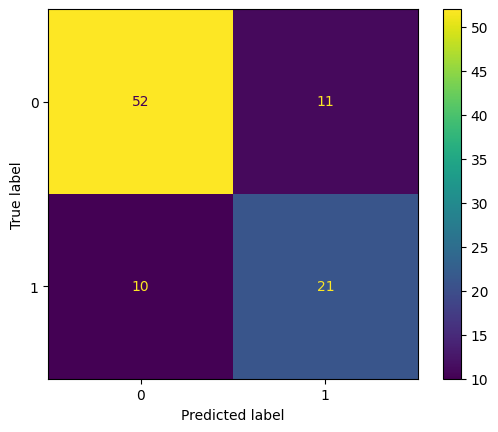

In [93]:
prediccion_arbol_des1 = arbol_des1.predict(x_des1_val)
ConfusionMatrixDisplay.from_predictions(y_des1_val, prediccion_arbol_des1);

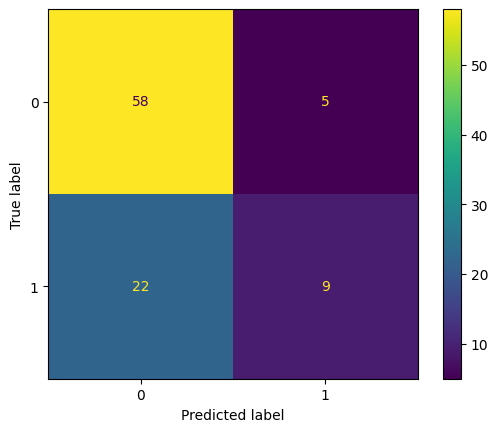

In [94]:
prediccion_rf_des1 = random_forest_des1.predict(x_des1_val)
ConfusionMatrixDisplay.from_predictions(y_des1_val, prediccion_rf_des1);

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

Explicación del gráfico.<br>
Tengo poco mas de 10.000 VERDADEROS NEGATIVOS (TN:True Negative), que corresponde a los casos donde el valor real era 0 (cero), o sea, "cumpidos" y el valor predicho era 0 (cero) o sea Verdadero negativo, realmente es un cliente "cumplido".<br>
Tengo tb el caso de 123 donde el valor real era cero, pero fue catalogado de "moroso", o sea FALSO POSITIVO (FP: False Positive), es un falso "moroso", por que en realidad es "cumplido". Este se conoce como Error Tipo I.<br>
En el tercer cuadrante tengo 957 valores reales 1 "moroso", pero el modelo los clasificó como "cumplidos", o sea eran cero, lo que es un FALSO NEGATIVO (FN:False Negative), pues lo predije falsamente, que corresponde a un Error Tipo 2, mi modelo dijo que eran "cumplidos" pero en realidad eran "morosos".<br>
Y tengo 45 VERDADEROS POSITIVOS (TP: True Positive), que son los casos en que el modelo efectivamente predijo clientes morosos que realmente si eran morosos.<br>

Viendo estos números, ya sabemos que nuestro modelo no está generalizando bien.<br>
Las siguientes métricas, precisión, recall (sensibilidad), F1, accuracy (exactitud) y specificity, las vamos a utilizar con sklearn.



<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score

In [118]:
20/(20+56) #precisión

0.2631578947368421

La precisión da 26%, valor muy bajo

In [122]:
print(f'La precisión del modelo es {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (recall) del modelo es {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es {accuracy_score(y_val, y_previsto)}')
print(f'El F1 del modelo es {f1_score(y_val, y_previsto)}')
# F1 toma 2 veces la precisión x recall y lo divide por la precisión mas el recall, penaliza mi modelo

La precisión del modelo es 0.2631578947368421
La sensibilidad (recall) del modelo es 0.02493765586034913
La exactitud (accuracy) del modelo es 0.9087642896026129
El F1 del modelo es 0.04555808656036447


La precisión coinicde con el cálculo manual.<br>
La ensibilidad es 0.025, 0 sea 3% de sensibilidad. 782 FN TipoII, lo que significa que la financiera está prestando dinero a mucha gente morosa, problema muy grave este último dato.<br>

Entonces la métrica que se va a priorizar es "recall", pues queremos reducir al máximo el error FN Tipo II.

Al revisar F1, vemos que también señala un valor lejano de uno, lo que indica que el modelo está desempeñándose muy mal.

##### <font color='blue'>**Para saber más**: cuándo usar cada métrica

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación, cada una de ellas tiene ventajas y limitaciones. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión. Las principales métricas de clasificación son:

<u>**Exactitud**</u><br>
Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

A continuación, podemos analizar el cálculo de la exactitud a partir de la matriz de confusión. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).

![Imagen ilustrativa](https://cdn1.gnarususercontent.com.br/6/103811/206d1736-8f53-4044-8efe-e1997383a63f.png)

<u>**Recuperación (recall)**</u><br>
Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

![Imagen ilustrativa](https://cdn1.gnarususercontent.com.br/6/103811/25882a06-88fd-44de-bd0c-6808b369c82e.png)

<u>**Precisión**</u><br>
Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

![Imagen ilustrativa](https://cdn1.gnarususercontent.com.br/6/103811/a6eb12a7-54c1-4298-b800-9feadcf60aea.png)

<u>**F1-Score**</u><br>
Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall:

![Imagen ilustrativa](https://cdn1.gnarususercontent.com.br/6/103811/7a9ca0e8-8dff-4af2-9df4-b4b42618d9d3.png)


La elección de la métrica de clasificación adecuada depende del problema que se está resolviendo y de cada escenario. En los casos en que las clases están balanceadas y tienen importancia similar, la exactitud puede ser una buena métrica inicial. Sin embargo, cuando las clases están desequilibradas o los errores tienen costos diferentes, métricas como precisión, recall y F1-score son más indicadas.

### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


### Informe de métricas

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo